

# EDA on algerian forest dataset

# Problem Statement:

observation need to be done on dataset and predict weather there will be fire or not in forest

# Data Collection and reading

Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)

Top five Records

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

# this dataset has two regions, i am creating regions column ,and encoding it    as below

# '0' for Bejaia Region Dataset and

# '1' for Sidi-Bel Abbes Region Dataset

In [6]:
df.shape

(246, 14)

In [7]:
df.iloc[120:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [10]:
# droping the index[122,123] where another region starts(Sedi_Bel) and its columns

In [8]:
df.drop(index=[122,123], inplace=True)

In [9]:
df.iloc[120:]  # you can see below row 122 and 123 dropped 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [10]:
# reset the index number
df.reset_index(inplace=True)

In [11]:
df.iloc[120:].head()  # you can see below the rows has been reset 

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [12]:
# droping the index

df.drop('index', axis=1,inplace=True)

In [16]:
# creating regions, '0' for Bejaia Region Dataset and '1' for Sidi-Bel Abbes Region Dataset

In [17]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [14]:
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

# this will creat a new column'Region'fill 0 in all rows till index= 121 and 1 from index= 122

In [18]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [19]:
# below  five record
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
243,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


Shape of the data

In [20]:
df.shape

# intially there was 246 rows and 14 column, after romoving 2 rows and added 1 column(244,15)


(244, 15)

# fetching basic info of dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


# Data Cleaning

In [21]:
df.columns

# there is spaces in column name like 'RH','Rain', 'Classes'

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [22]:
# removing the spaces from column names

df.columns=[i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [23]:
print(df.to_string())

# some values in columns like Rain, FFMX,DMC etc have  a spaces

    day month  year Temperature  RH  Ws  Rain  FFMC   DMC      DC   ISI   BUI      FWI        Classes  Region
0    01    06  2012          29  57  18     0  65.7   3.4     7.6   1.3   3.4      0.5    not fire        0.0
1    02    06  2012          29  61  13   1.3  64.4   4.1     7.6     1   3.9      0.4    not fire        0.0
2    03    06  2012          26  82  22  13.1  47.1   2.5     7.1   0.3   2.7      0.1    not fire        0.0
3    04    06  2012          25  89  13   2.5  28.6   1.3     6.9     0   1.7        0    not fire        0.0
4    05    06  2012          27  77  16     0  64.8     3    14.2   1.2   3.9      0.5    not fire        0.0
5    06    06  2012          31  67  14     0  82.6   5.8    22.2   3.1     7      2.5        fire        0.0
6    07    06  2012          33  54  13     0  88.2   9.9    30.5   6.4  10.9      7.2        fire        0.0
7    08    06  2012          30  73  15     0  86.6  12.1    38.3   5.6  13.5      7.1        fire        0.0
8    09   

In [24]:
# removing spaces

for feature in ['Rain', 'FFMC', 'DMC', 'DC', "ISI","BUI",'FWI', "Classes"]:
    df[feature]=df[feature].str.replace(" ","")

In [25]:
df[df['FWI']=='fire'].index

# index = 165 has a 'fire' value it should be float 

Int64Index([165], dtype='int64')

In [26]:
df.loc[165:].head()  # you can see 'fire'in FWI columna t index= 165,12

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,fire,NaN,1.0
166,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire,1.0
167,16,07,2012,31,83,17,0,84.5,19.4,33.1,4.7,19.2,7.3,fire,1.0
168,17,07,2012,32,81,17,0,84.6,21.1,42.3,4.7,20.9,7.7,fire,1.0
169,18,07,2012,33,68,15,0,86.1,23.9,51.6,5.2,23.9,9.1,fire,1.0


In [28]:
# replace 'fire' with float, 0.1

# df.loc[165:"FWI"]= '0.1'  this will replace the all the value of dataset with 0.1

In [27]:
# replace 'fire' with float, 0.1

df.iloc[165,12]= '0.1'

In [28]:
df.loc[165:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,0.1,NaN,1.0
166,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire,1.0
167,16,07,2012,31,83,17,0,84.5,19.4,33.1,4.7,19.2,7.3,fire,1.0
168,17,07,2012,32,81,17,0,84.6,21.1,42.3,4.7,20.9,7.7,fire,1.0
169,18,07,2012,33,68,15,0,86.1,23.9,51.6,5.2,23.9,9.1,fire,1.0


In [29]:
for feature in df.columns:
    df[df[feature]=='fire'].index

In [30]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,notfire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,notfire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,notfire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,notfire,1.0
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,notfire,1.0
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,notfire,1.0


# Changing Datatypes

In [31]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [34]:
# changing data type from object int64 and float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [32]:
df_dtypes= {'day':'int64','month':'int64','year':'int64','Temperature':'int64',
           'RH':'int64','Ws':'int64','Rain':'float64','FFMC':'float64','DMC':'float64',
           'DC':'float64','ISI':'float64','BUI':'float64', 'FWI':'float64'}

In [33]:
df= df.astype(df_dtypes)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.7+ KB


In [35]:
df['day'].dtypes

dtype('int64')

# Handeling Null Values

In [39]:
# finding null values

In [46]:
df.isnull().sum()

# there is one null value in 'Classes' feature/column

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [47]:
df[df['Classes']=='NaN'].index

# there is NaN in Classes at 165 rows

Int64Index([], dtype='int64')

In [48]:
df.loc[165:].head() # you can see NaN at 165th row

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,0.1,fire,1.0
166,15,7,2012,34,45,17,0.0,90.5,18.0,24.10,10.9,17.7,14.1,fire,1.0
167,16,7,2012,31,83,17,0.0,84.5,19.4,33.10,4.7,19.2,7.3,fire,1.0
168,17,7,2012,32,81,17,0.0,84.6,21.1,42.30,4.7,20.9,7.7,fire,1.0
169,18,7,2012,33,68,15,0.0,86.1,23.9,51.60,5.2,23.9,9.1,fire,1.0


In [49]:
# replaceing a nan valu with 'fire'

In [50]:
df.iloc[165,13]

'fire'

In [51]:
df.iloc[165,13]='fire'

In [52]:
df.loc[165:].head()  # nan replaced with fire 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,0.1,fire,1.0
166,15,7,2012,34,45,17,0.0,90.5,18.0,24.10,10.9,17.7,14.1,fire,1.0
167,16,7,2012,31,83,17,0.0,84.5,19.4,33.10,4.7,19.2,7.3,fire,1.0
168,17,7,2012,32,81,17,0.0,84.6,21.1,42.30,4.7,20.9,7.7,fire,1.0
169,18,7,2012,33,68,15,0.0,86.1,23.9,51.60,5.2,23.9,9.1,fire,1.0


In [53]:
# you can see 0 null values in dataset

df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [55]:
df.shape

(244, 15)

In [56]:
df_copy= df.copy()

In [58]:
df.shape

(244, 15)

# Saving a cleaned CSV file for future referance

In [60]:
df_copy.to_csv('algerian_clean.csv', index=False)

In [64]:
pd.read_csv('Algerin_clean.csv')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,notfire,1.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,notfire,1.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,notfire,1.0


# EDA

# Numerical and Categorical features

# Numeric Feature

In [48]:
num_feat= [feature for feature in df.columns if df[feature].dtype!='O']
print(num_feat)

['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']


In [49]:
df[num_feat].nunique()

# fetching no of unique value/category on each num feature

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Region           2
dtype: int64

# Top five numeric feature has more unique values

In [50]:
df[num_feat].nunique().sort_values(ascending= False).head()

DC      198
BUI     174
FFMC    173
DMC     166
FWI     125
dtype: int64

# Top  numeric feature has less unique values

In [51]:
df[num_feat].nunique().sort_values(ascending= True).head()

year            1
Region          2
month           4
Ws             18
Temperature    19
dtype: int64

# There are two type of numeric feature based on unique values we will clasify that
# 1, Discret 
# 2, Continues

# Discret Numerical features

In [52]:
# assumption: the feature must have less than 35 unique value

discret_fet= [i for i in num_feat if len(df[i].unique())<35]

In [53]:
discret_fet

['day', 'month', 'year', 'Temperature', 'Ws', 'Region']

# Continues Numeric Feature

In [54]:
# Assumption: the feature should have grater than unique value

cont_feat= [i for i in num_feat if len(df[i].unique())>35]

In [55]:
cont_feat

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Let's understand the distrubution of numeric feature

# Discret feat vs target feat(Classes)

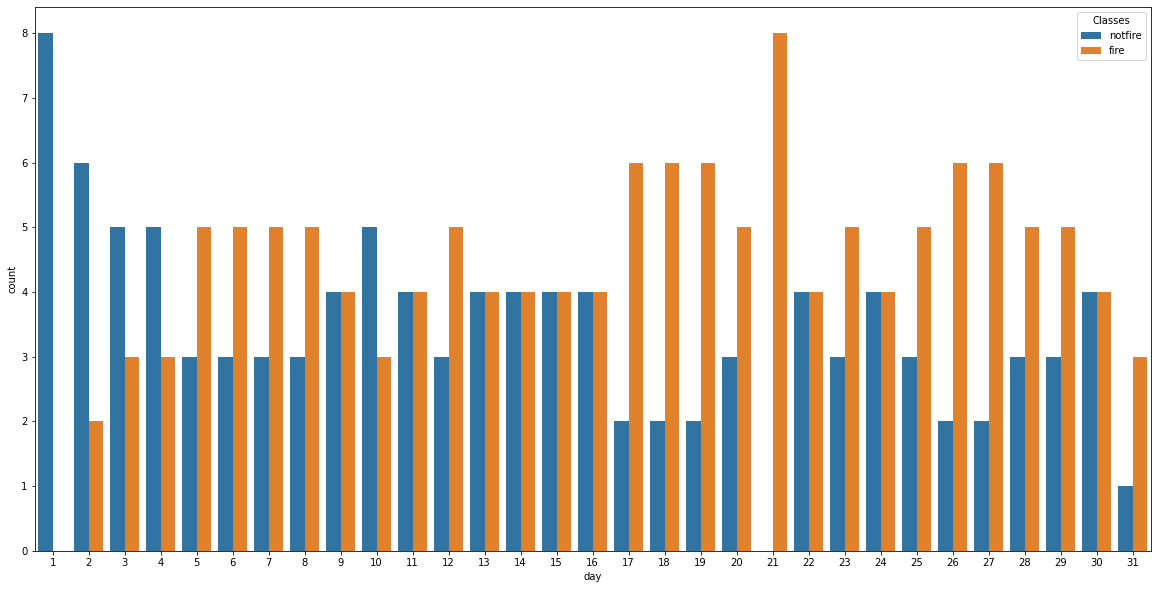

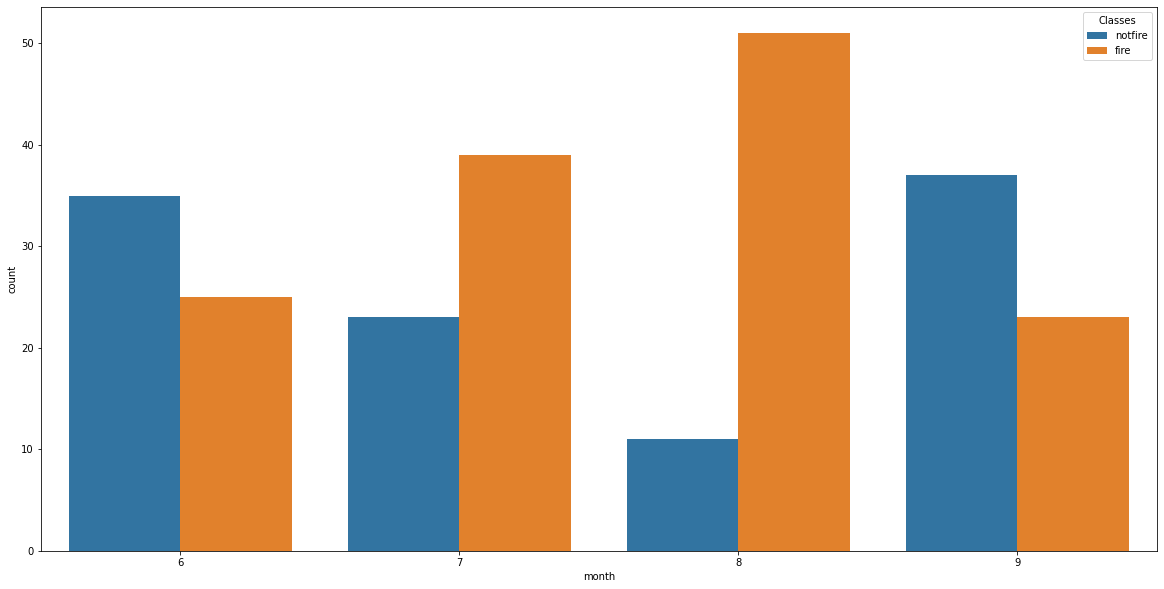

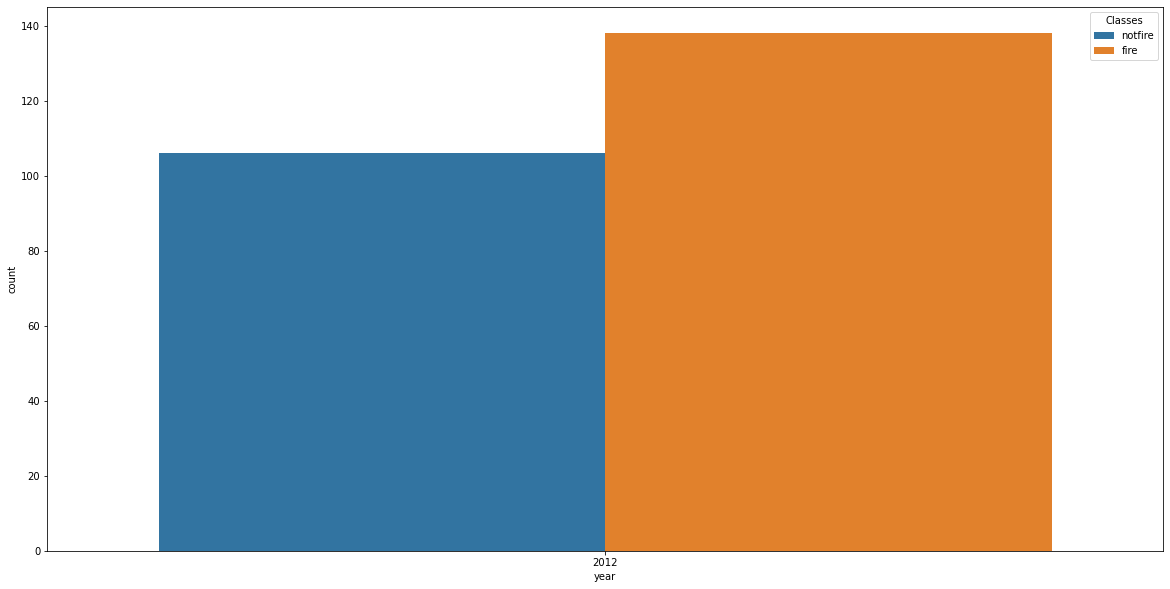

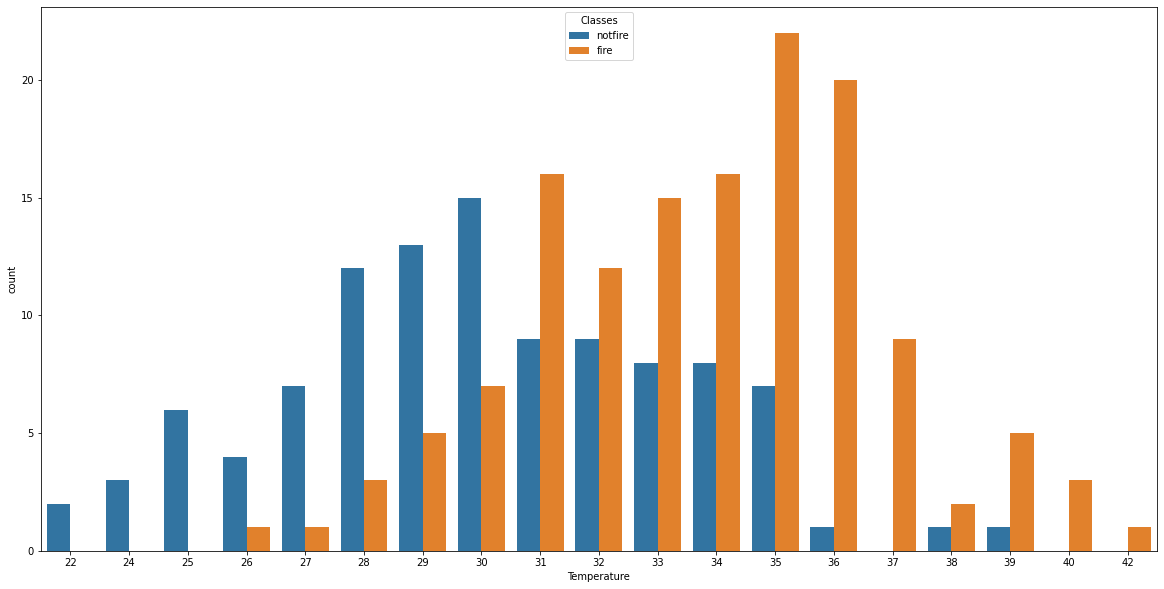

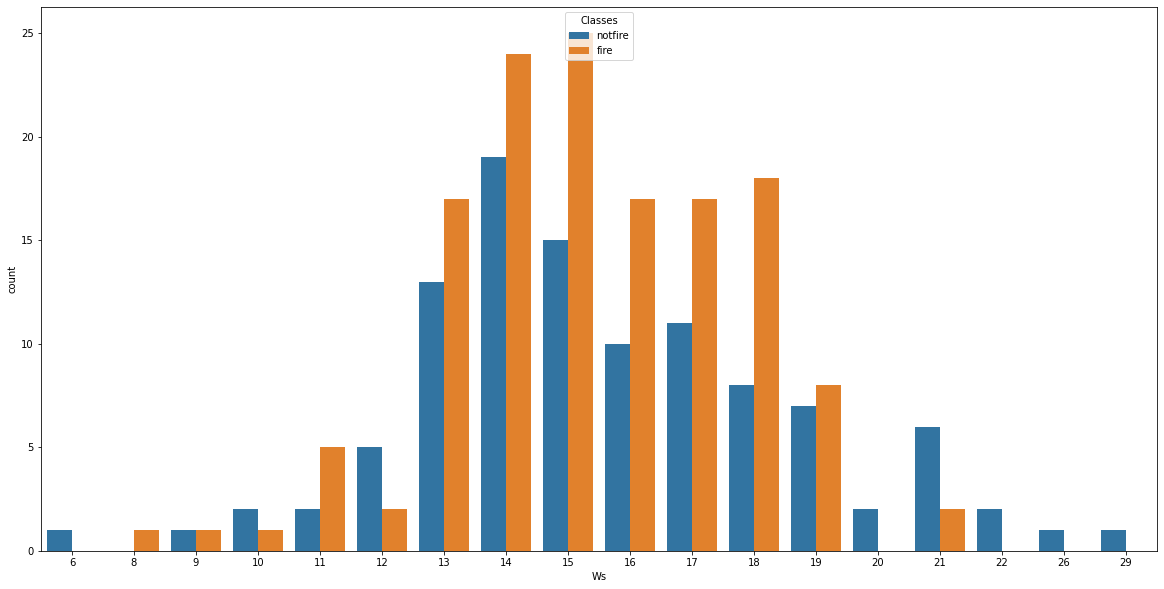

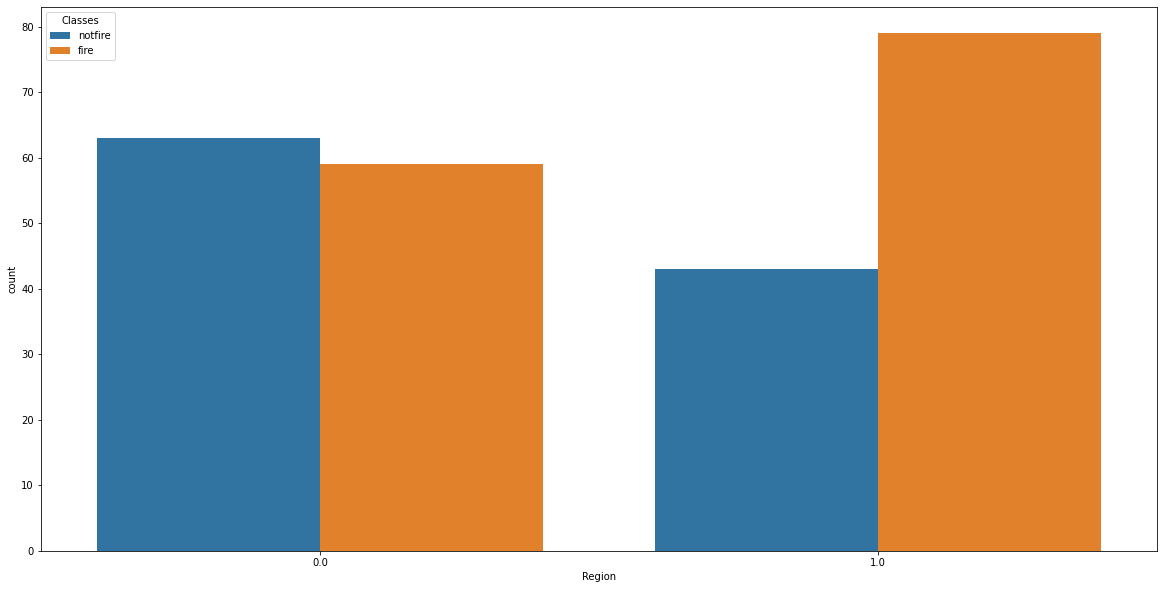

In [56]:
# Discret feat vs target fet(Classes)
for i in discret_fet:
    plt.figure(figsize=(20,10))
    sns.countplot(data=df, x=i,hue='Classes')
    plt.show()

# Observation from above Grapgh(Discret Numeric Vs Target Variable):

1. In day vs classes, the occurence of fire is more than no fire.
2. In month vs classes, in the month of july and august fire cases are high.
3. Highest fire cases are in august month.
4. In temprature vs classes from 31 to 36 degree celcius no of fire cases are high.
5. In windspeed vs classes it is clearly visible that from 13-18 km/hr range there is most no of fire occurences.
6. In region vs classes, sedi bel-abbes region the no of fire cases are more than bajaia region.
7. final conclusion is that Fire occurences are more than no fire occurence. 

# On which day no of  fire and notfire has occured more ?

<AxesSubplot:xlabel='day', ylabel='count'>

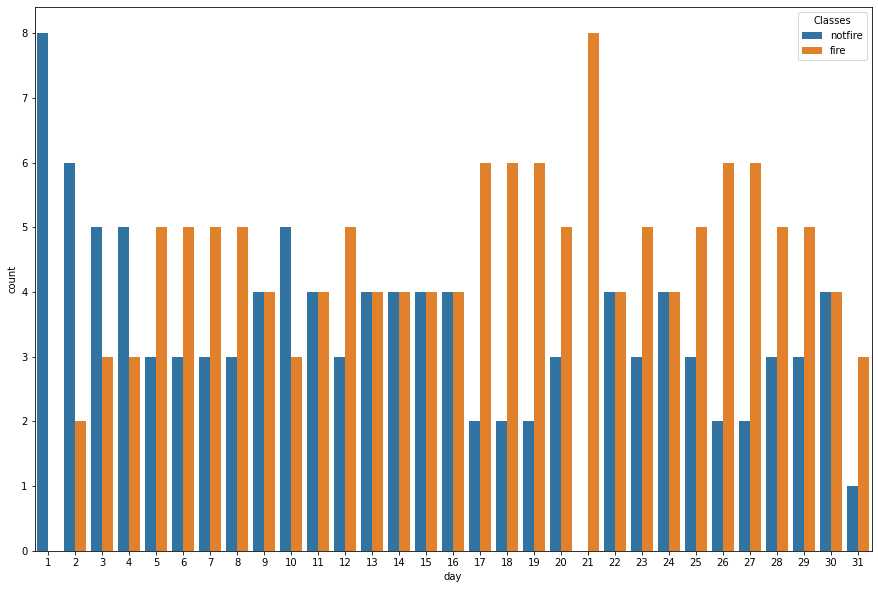

In [57]:
plt.figure(figsize=(15,10))
sns.countplot(df['day'], hue=df['Classes'])

# Observation:
    1, on 21st day the no of fire occurance is more
    2, on 1st day the no of not fire occurances is more
    3, on 31st day the no of not fire occurance is less(1 times)
    4, on 2nd day  the no of fire occurances is less(2 times)

# from the above graph 
on 1st day there is no fire throught the day 

on 21st day there is a fire throught the day 

In [58]:
df.groupby('Classes')['day'].sum()

# fire occurance is more than not fire

Classes
fire       2389
notfire    1455
Name: day, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

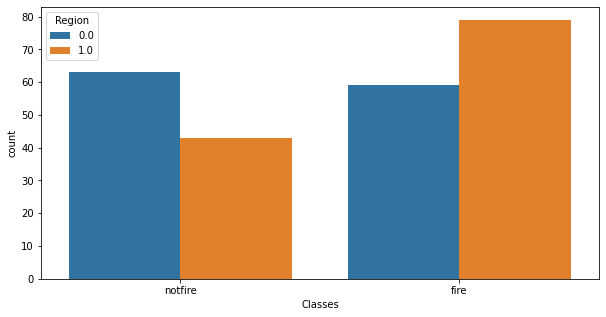

In [62]:
# no of count for each categiry Classes
plt.figure(figsize=(10,5))
sns.countplot(data=df, x= 'Classes', hue='Region')

# you can see below the fire occurance is more than not fire in Region 1(Sidi bel addes Region)

In [59]:
df.groupby('Classes')['day'].value_counts().sort_values(ascending=False).head()
# 1, on 21st day the no of fire occurance is more(8 times)
# 2  on 1st day the no of not fire occurances is more (8 times)

Classes  day
fire     21     8
notfire  1      8
fire     18     6
         17     6
         19     6
Name: day, dtype: int64

In [60]:
df.groupby('Classes')['day'].value_counts().sort_values(ascending=True).head(10)
# 1, on 31st day the no of not fire occurance is less(1 times)
# 2, on 2nd day  the no of fire occurances is less(2 times)

Classes  day
notfire  31     1
         26     2
         19     2
         18     2
         17     2
         27     2
fire     2      2
         31     3
notfire  29     3
         28     3
Name: day, dtype: int64

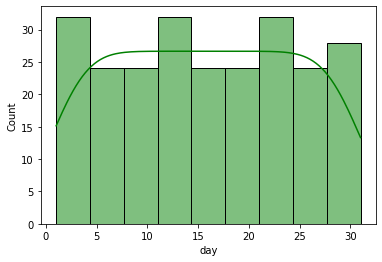

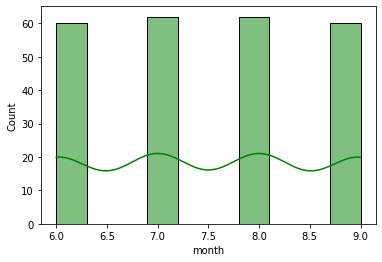

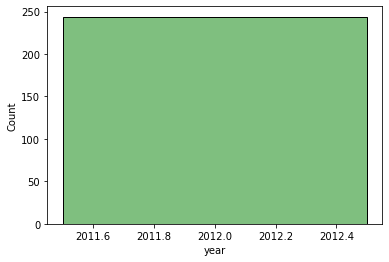

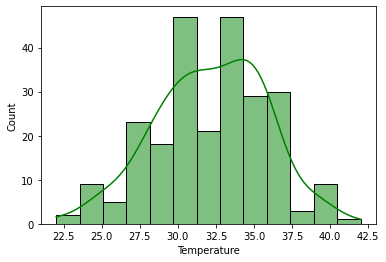

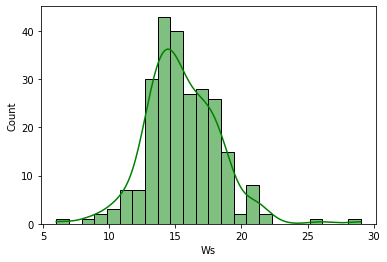

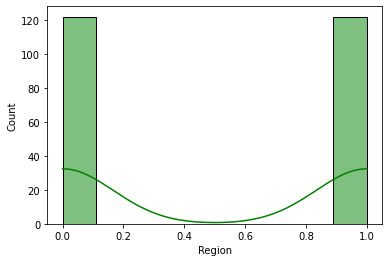

In [171]:
# Discret_fet vs target fet(Classes)
for i in discret_fet:
    #plt.figure(figsize=(20,10))
    sns.histplot(data=df, x= i, kde= True, color='g')
    plt.show()

# Cont feat vs target feature('Classes')

In [177]:
cont_feat

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

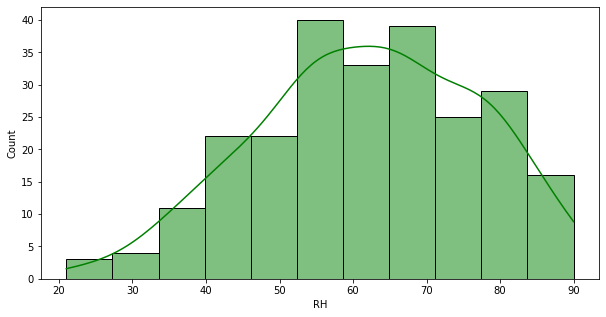

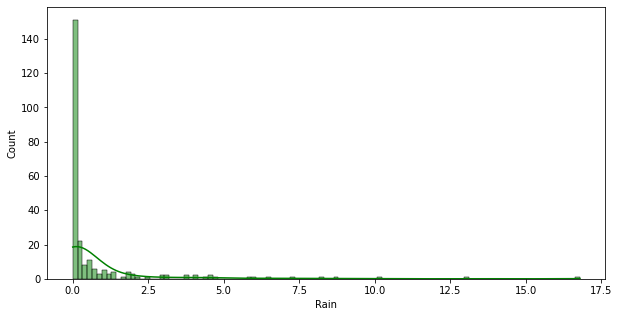

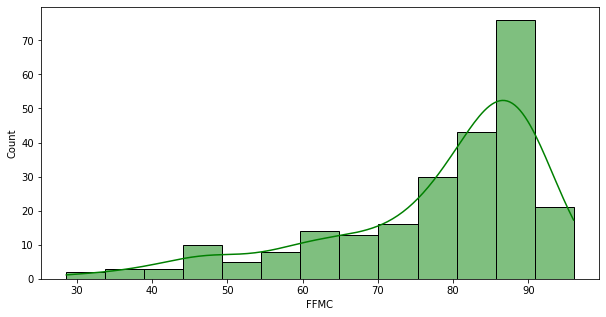

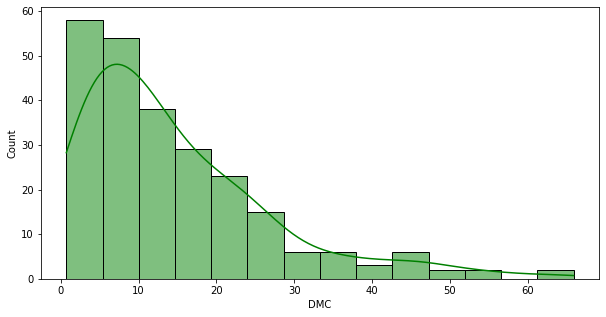

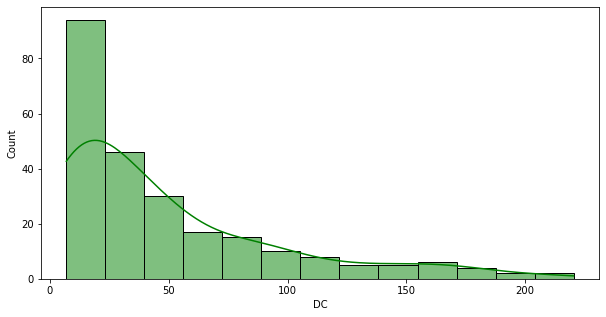

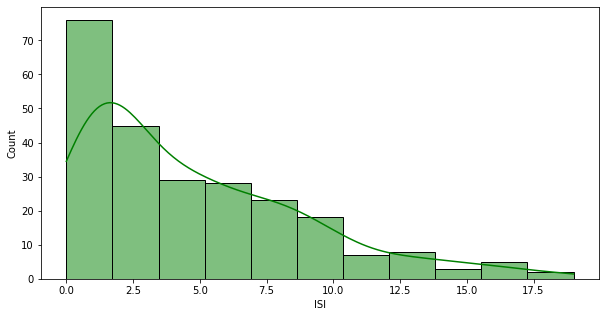

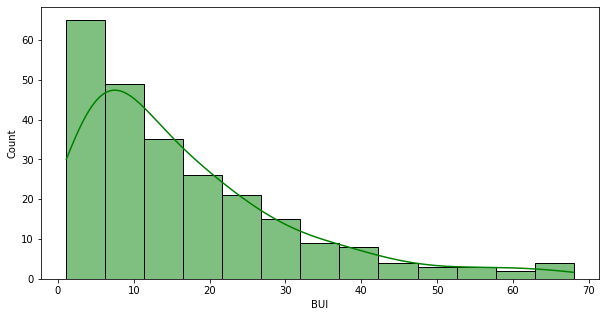

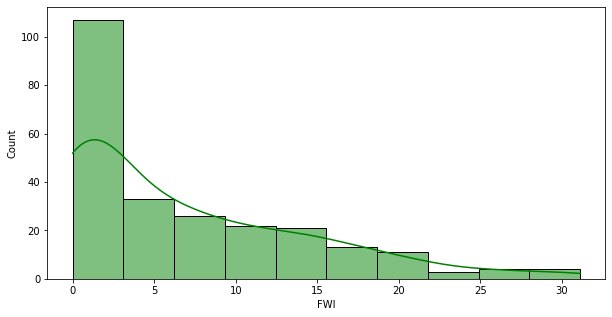

In [79]:
for i in cont_feat:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df, x=i, kde=True,color='g')
    plt.show()

# Observation

1, relative humidity(HM) following gaussian distribution and no outliers

2, rain following lognaormaal right skewed distributionanf there are a outliers

3, 'DC', 'ISI', 'BUI', 'FWI' follow lognaormaal right skewed distribution with     less outliers

4, FFMC follw lognormal left skewd distribution




In [164]:
df[cat_feat].nunique()

# fetching no of unique value/category in cat_feature

# there are two categoru on Classes, fir, and notfire

Classes    2
dtype: int64

In [163]:
for i in cat_feat:
    print(df.groupby(i)['Region'].value_counts())
    
# from this observation i can conclude that in Region one(Sidi bel) the fire occurance is more

Classes  Region
fire     1.0       79
         0.0       59
notfire  0.0       63
         1.0       43
Name: Region, dtype: int64


In [174]:
df.groupby('Classes')['day'].value_counts().sort_values(ascending=False).head()

# on 21st the no of fire occurance is Minimum

Classes  day
fire     21     8
notfire  1      8
fire     18     6
         17     6
         19     6
Name: day, dtype: int64

In [175]:
df.groupby('Classes')['day'].value_counts().sort_values(ascending=True).head()
# on 31st the no of fire occurance is MOnimum

Classes  day
notfire  31     1
         26     2
         19     2
         18     2
         17     2
Name: day, dtype: int64

# Outliers

In [80]:
discret_fet

['day', 'month', 'year', 'Temperature', 'Ws', 'Region']

In [81]:
cont_feat

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

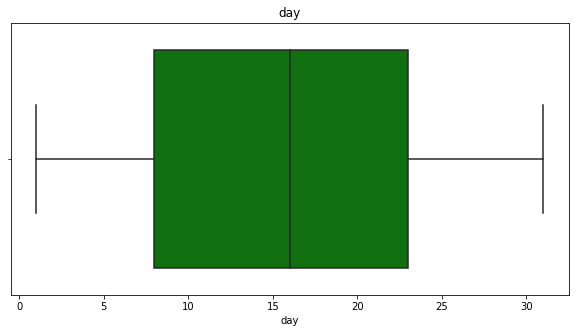

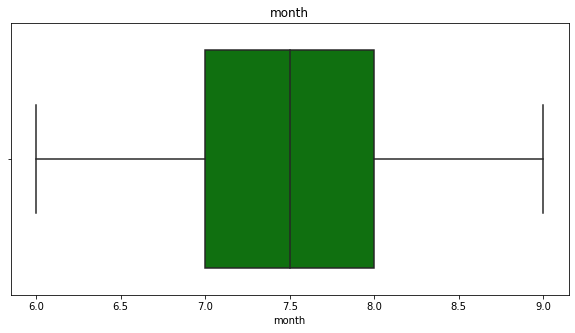

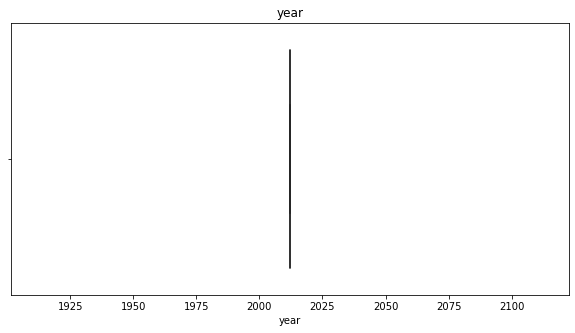

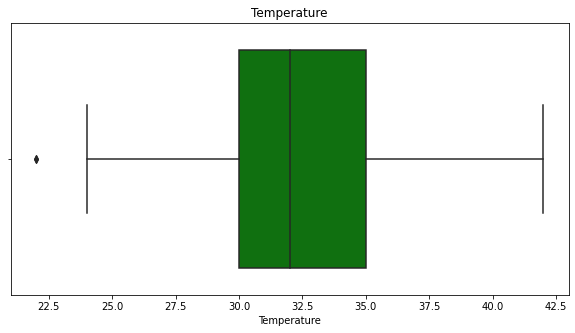

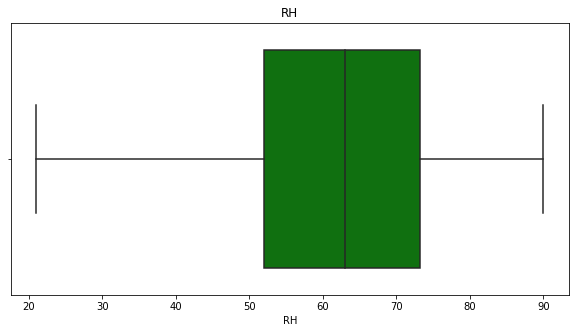

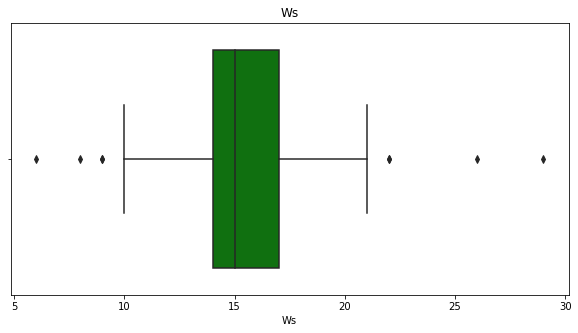

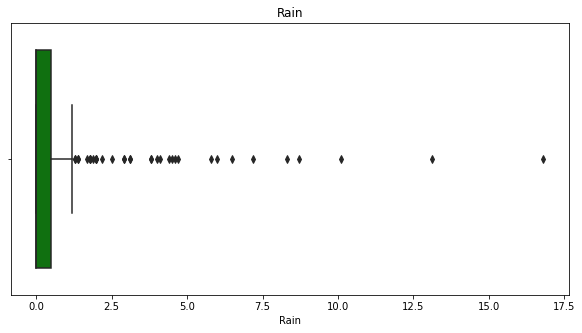

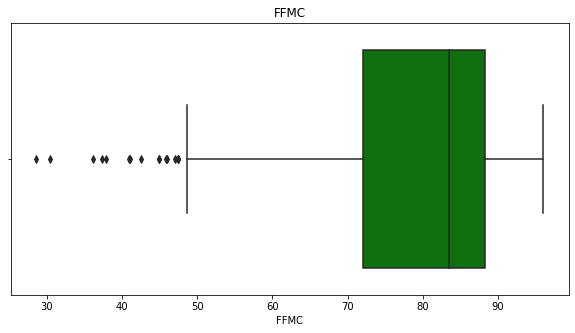

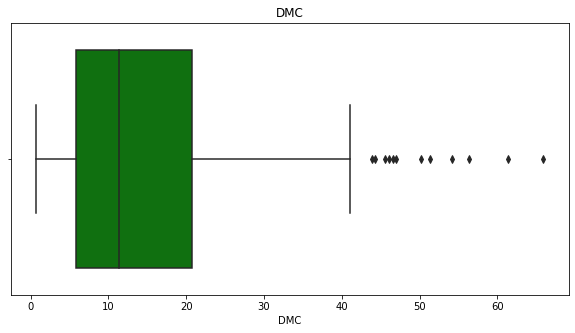

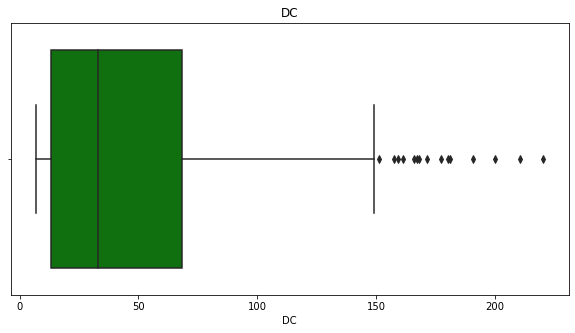

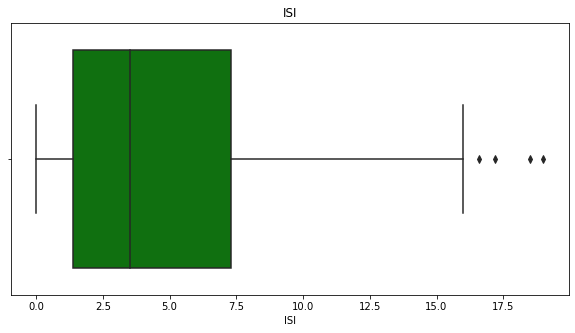

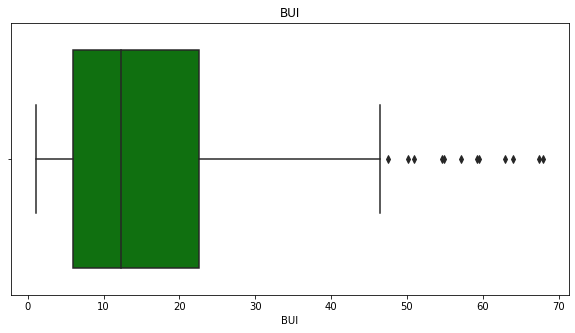

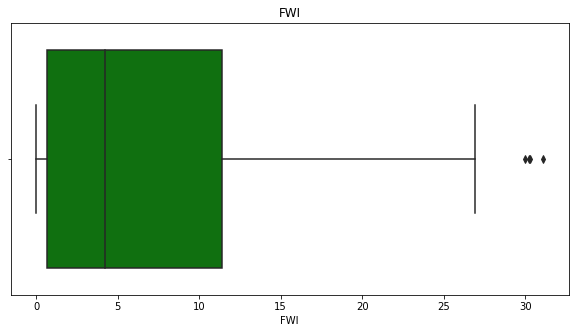

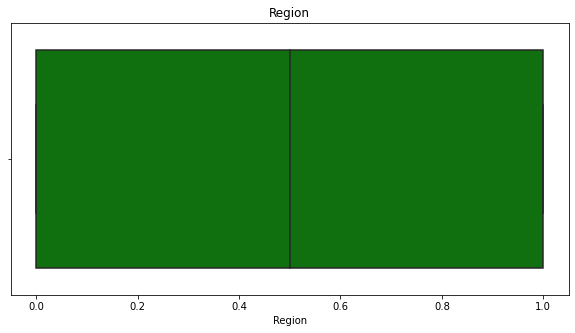

In [96]:
for i in num_feat:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x=i, color='g')
    plt.title(i)
    plt.show()

# Observation:

1. RH, day, month, region  and year doesn't have outliers.

2. Temprature and FFMC have left side outliers.(since the distubution was left skewed)

3. WS hase outliers in both the sides.

4. Rain,DMC,DC,ISI,BUI and FWI have outliers in rught side(since the distubution was right skewed)


<AxesSubplot:xlabel='RH'>

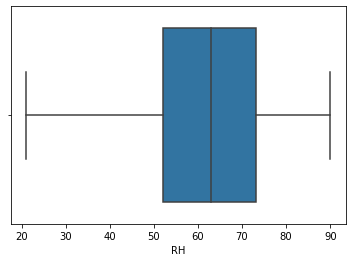

In [145]:
sns.boxplot( x=df['RH'])

#  there is no outliers since it foll gaussian/normal distribution

<AxesSubplot:xlabel='day'>

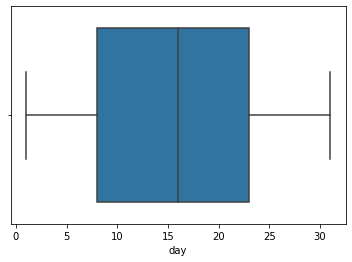

In [97]:
sns.boxplot( x=df['day'])

#  there is no outliers since it foll gaussian/normal distribution

<AxesSubplot:xlabel='month'>

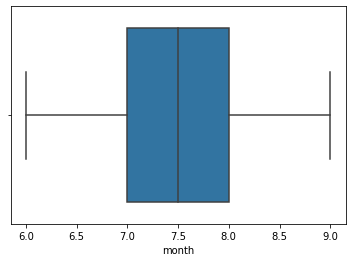

In [98]:
sns.boxplot( x=df['month'])

#  there is no outliers since it foll gaussian/normal distribution

# Statistical analysis

In [102]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.006967,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.438505,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [140]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,notfire,1.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,notfire,1.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,notfire,1.0


In [137]:
data=round(df[[i for i in num_feat if i not in ['day','month','year','Region']]], 3)

In [143]:
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


# Strp plot


In [148]:
# Relationship between Numeric Feature and Target Feature

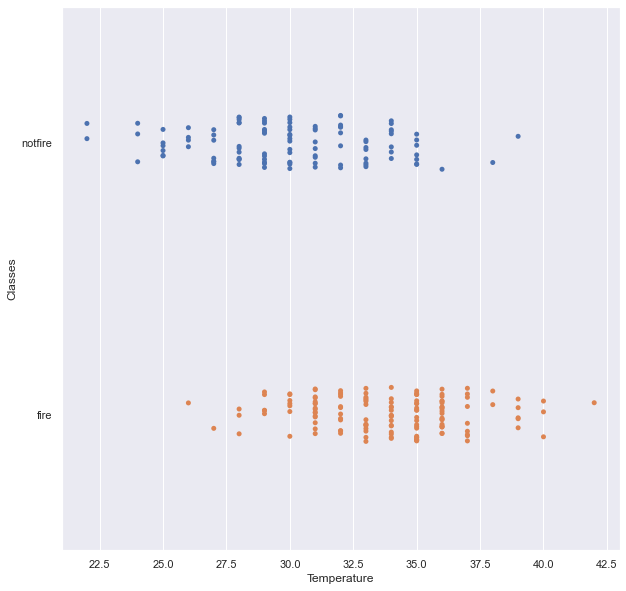

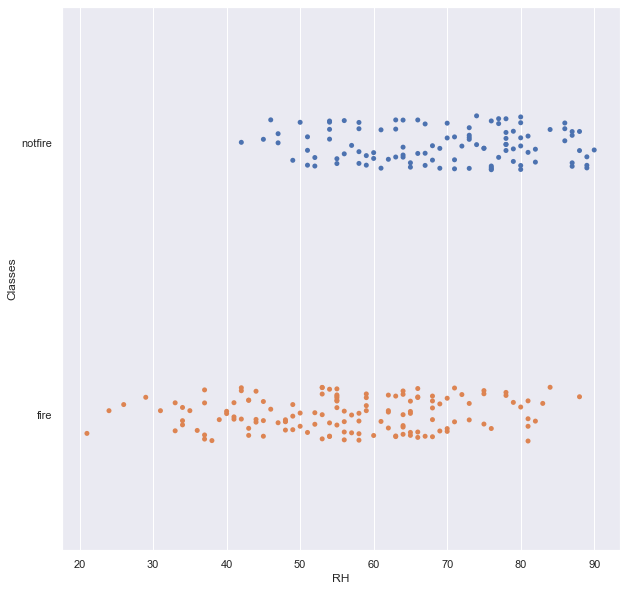

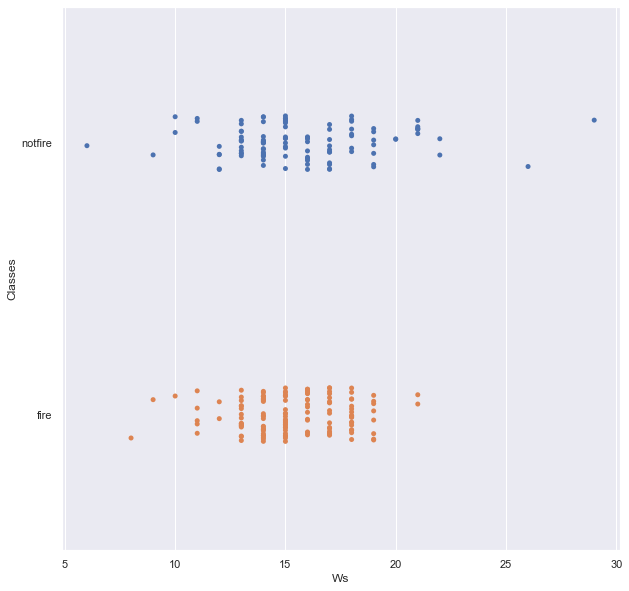

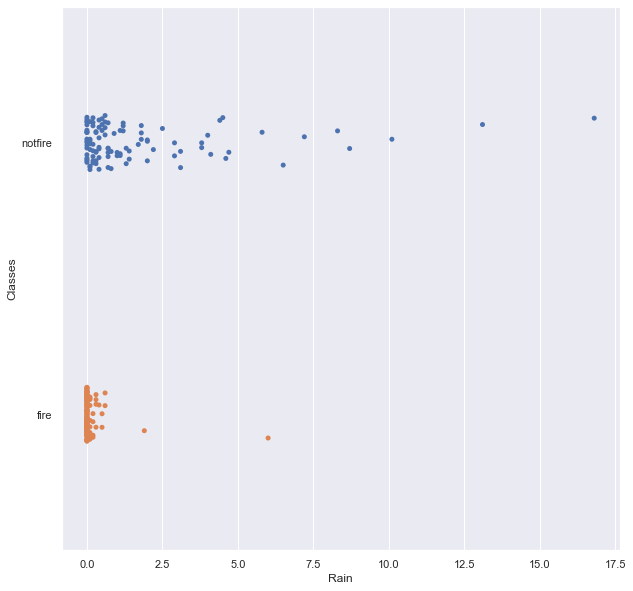

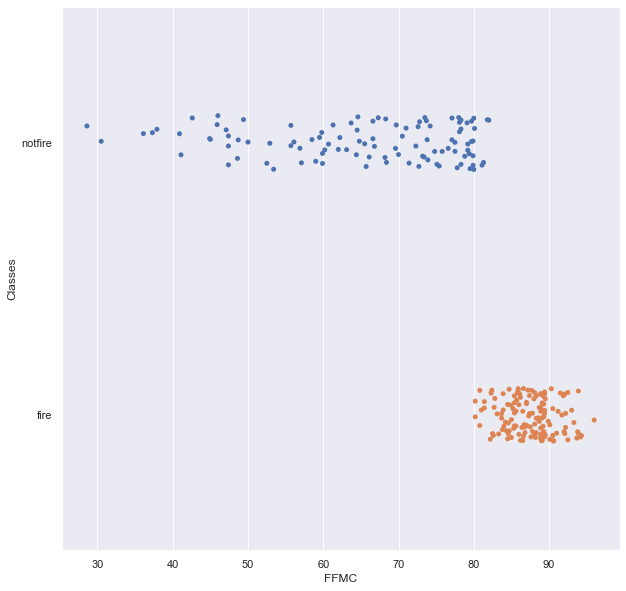

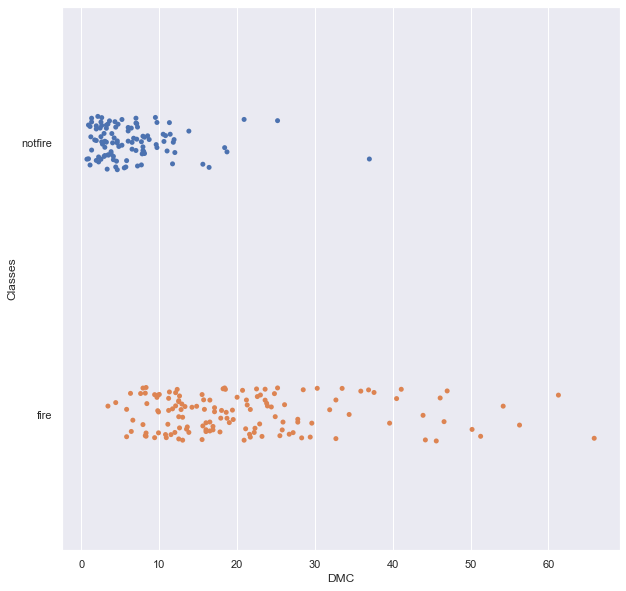

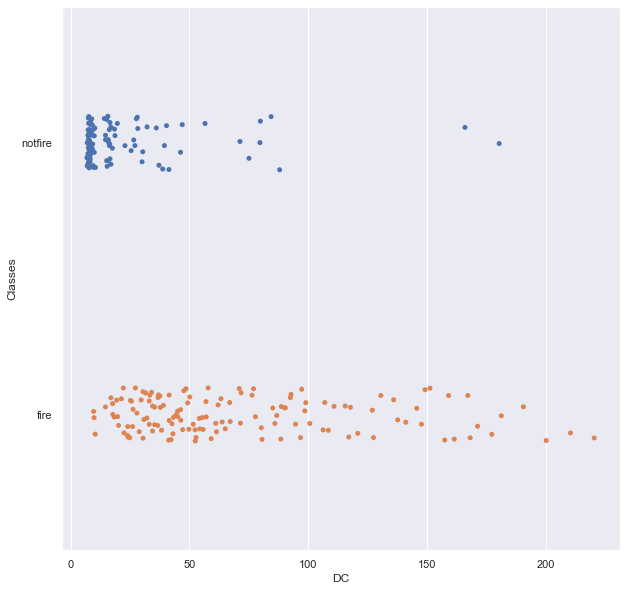

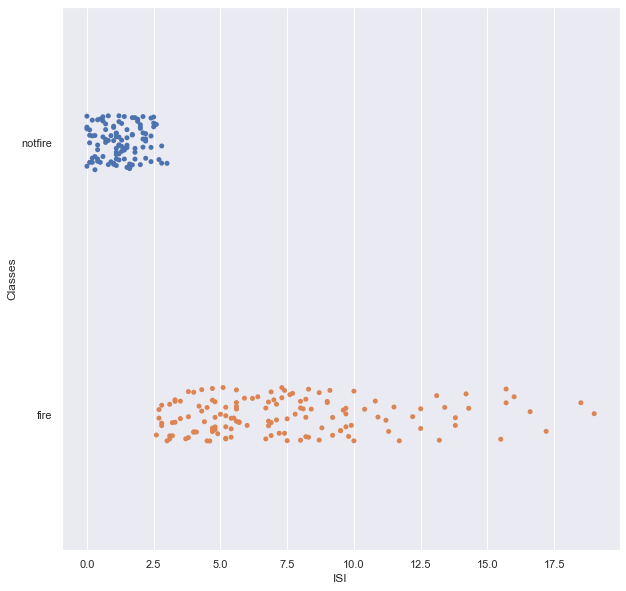

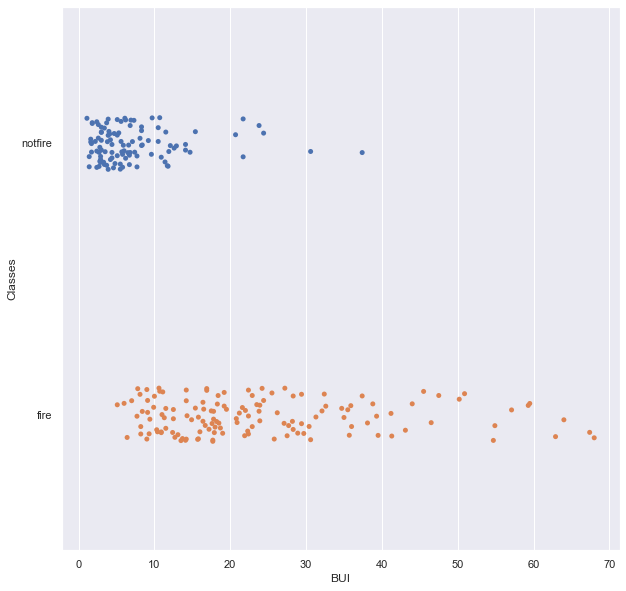

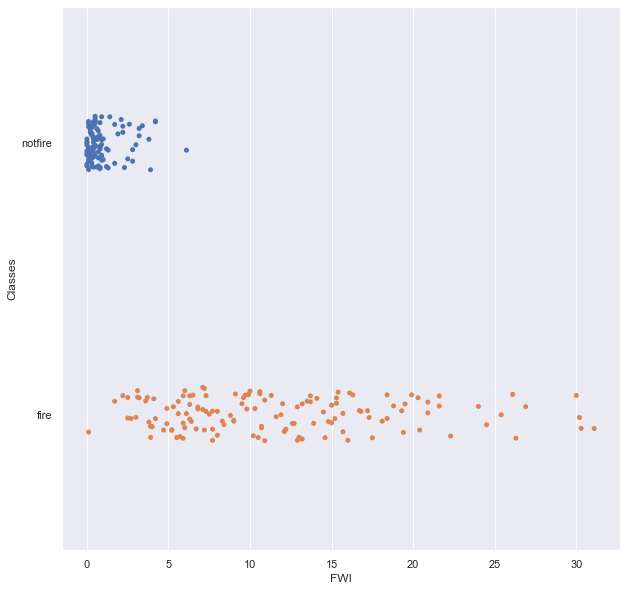

In [147]:
num_values_custom = [i for i in num_feat if i not in ['day','month','year','Region']]
for i in num_values_custom:
    sns.stripplot(data=df,x=i,y='Classes')
    plt.show()

# Observation 

1. There is no null values in the dataset.
2. Highly correlative: DMC-BUI,DC-BUI,ISI-FWI.
3. correlative: FFMC-ISI,FWI-DC,DC-DMC,FWI-BUI,FWI-DMC.
4. Relative humidity is following Gaussian Distribution
5. Rain,DMC,DC,ISI,BUI,FWI are following right skewed distribution.
6. FFMC is following left skewed distribution.
7. In day vs classes, the occurence of fire is more than no fire.
8. In month vs classes, in the month of july and august fire cases are high.
9. Highest fire cases are in august month.
10. In temprature vs classes from 31 to 36 degree celcius no of fire cases are high.
11. In windspeed vs classes it is clearly visible that from 13-18 km/hr range there is most no of fire occurences.
12. In region vs classes, sedi bel-abbes region the no of fire cases are more than bajaia region.
13. final conclusion is that Fire occurences are more than no fire occurence.

In [149]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,notfire,1.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,notfire,1.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,notfire,1.0


In [151]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [153]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [157]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire,0.0


In [160]:
df.to_csv('Algerin_clean.csv', index=False)

In [161]:
pd.read_csv('Algerin_clean.csv')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,notfire,1.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,notfire,1.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,notfire,1.0


<AxesSubplot:ylabel='Region'>

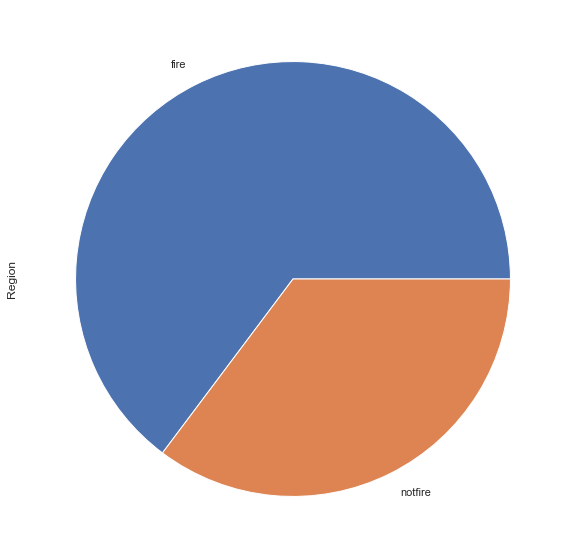

In [177]:
df.groupby(['Classes'])['Region'].sum().nlargest(10).plot.pie()



In [65]:
df_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire,0.0
